## Problem 2: Decision Trees on Kaggle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml


X = np.genfromtxt("data/X_train.txt")
Y = np.genfromtxt("data/Y_train.txt")

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.80)

Xte = np.genfromtxt('data/X_test.txt')

### part f

The area under the validation curve is 0.675478370811


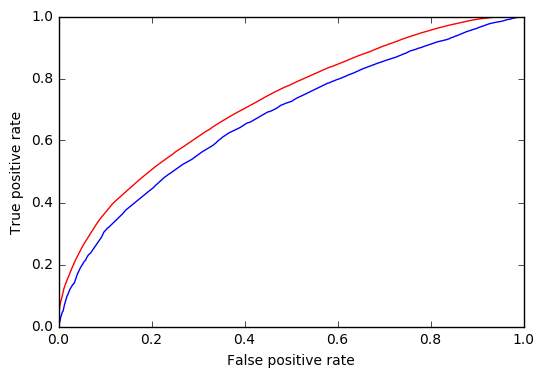

In [11]:
learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=10)
print 'The area under the validation curve (blue) is', learner.auc(Xva, Yva)

roc_data = learner.roc(Xva, Yva)
false_positive = roc_data[0]
true_positive = roc_data[1]

roc_data_train = learner.roc(Xtr, Ytr)
fpT = roc_data_train[0]
tpT = roc_data_train[1]

plt.plot(false_positive, true_positive, 'b-')
plt.plot(fpT, tpT, 'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### part g

In [13]:
Ypred = learner.predictSoft(Xte)
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('test.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

## Problem 3: Random Forests

### part a

In [3]:
M = Xtr.shape[0]
Mv = Xva.shape[0]
rforest = [None]*25
YtHat = np.zeros((M,25))
YvHat = np.zeros((Mv, 25))
for l in range(25):
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, M)
    rforest[l] = ml.dtree.treeClassify()
    rforest[l].train(Xi, Yi, maxDepth=20, nFeatures=10)
    YtHat[:,l] = rforest[l].predict(Xtr)
    YvHat[:,l] = rforest[l].predict(Xva)
    
    if l+1 in [1,5,10,15,25]:
        errT = ((Ytr - YtHat[:,0:l+1].mean(axis=1)>.5)).mean()
        errV = ((Yva - YvHat[:,0:l+1].mean(axis=1)>.5)).mean()
        print "{:02d} members: {} train, {} valid".format(l+1, errT, errV)

01 members: 0.134775 train, 0.19995 valid
05 members: 0.1281 train, 0.208 valid
10 members: 0.11015 train, 0.1988 valid
15 members: 0.1282375 train, 0.2158 valid
25 members: 0.1271125 train, 0.216 valid


In [4]:
class randomForest(ml.base.classifier):
    def __init__(self, learners):
        self.learners=learners;
        self.classes=learners[0].classes;
    
    def predictSoft(self,X):
        ysoft = np.zeros((X.shape[0],len(self.classes)));
        for i in range(len(self.learners)): 
            ysoft[:,1]+=self.learners[i].predict(X);
        return ysoft/len(self.learners);

In [6]:
rf = randomForest(rforest);
print "AUC Train: ",rf.auc(Xtr,Ytr)," Valid: ",rf.auc(Xva,Yva)

AUC Train:  0.950973809281  Valid:  0.726222595191


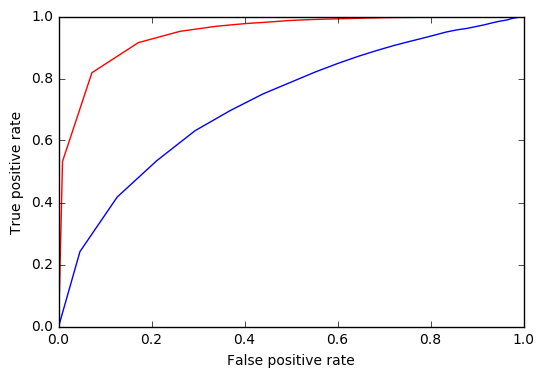

In [7]:
roc_data = rf.roc(Xva, Yva)
false_positive_val = roc_data[0]
true_positive_val = roc_data[1]

roc_data = rf.roc(Xtr, Ytr)
false_positive_train = roc_data[0]
true_positive_train = roc_data[1]

plt.plot(false_positive_val, true_positive_val, 'b-')
plt.plot(false_positive_train, true_positive_train, 'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [9]:
Ypred = rf.predictSoft(Xte)
print 'Ypred shape is', Ypred.shape
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Yhat_rforest.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

Ypred shape is (100000L, 2L)


In [1]:
print type(Ypred)
print Ypred

NameError: name 'Ypred' is not defined

In [11]:
np.arange(len(Ypred))

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [16]:
print len(Ypred[:,0])
print len(Ypred[:,1])

100000
100000
